https://pandas.pydata.org/docs/reference/api/pandas.Series.html

## Εισαγωγή στα  Pandas Series

Τα σύνολα δεδομένων στη Pandas είναι συνήθως πολυδιάστατοι πίνακες, που όπως είδαμε ονομάζονται DataFrames.


Tο Pandas Series είναι όπως μια στήλη ενός πίνακα, μονοδιάστατος πίνακας που μπορεί να περιέχει ό,τι τύπου δεδομένα επιθυμούμε. Αντίθετα ένα DataFrame είναι ολόκληρος ο πίνακας.

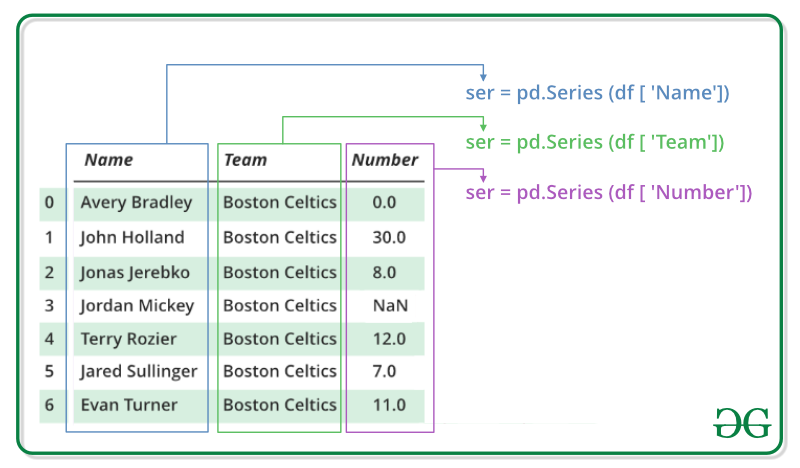
src :  https://www.geeksforgeeks.org/python-pandas-series/

In [1]:
import pandas as pd

### Δημιουργία Series

#### Χρήση κατασκευαστή

In [29]:
myvar = pd.Series()#unlabeled series
print(myvar)

Series([], dtype: float64)


C:\Users\Mariannita\miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


#### Δημιουργία Series χρησιμοποιώντας μια λίστα

In [32]:
#Converting a list to series
a = [1, 7, 2]

myvar = pd.Series(data=a)#unlabeled series
print(myvar)
print(type(myvar))

0    1
1    7
2    2
dtype: int64
<class 'pandas.core.series.Series'>


In [40]:
#Converting a series to list
myvar_as_list = myvar.tolist()
print(myvar_as_list)

['orange', 'cherry', 'apple']


#### Δημιουργία Series χρησιμοποιώντας ζεύγη Key/Value δηλαδή ενός λεξικού (dictionary)

In [55]:
calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(data=calories)
 
print(myvar) #check that keys function as indexes, not column names

day1    420
day2    380
day3    390
dtype: int64


In [56]:
myvar.index #Doesn't it look like a list??

Index(['day1', 'day2', 'day3'], dtype='object')

In [58]:
myvar.values

array([420, 380, 390], dtype=int64)

### Επιλογή τιμής
#### Η επιλογή τιμής μπορεί να γίνει είτε με τη χρήση των labels είτε με των indexes

Ετικέτες (Labels)

Αν δεν έχει δηλωθεί κάτι άλλο τα δεδομένα λαμβάνουν ως ετικέτες (δείκτες) που ξεκινούν την αρίθμηση από το 0. Αυτές οι "ετικέτες" ή οι δείκτες μας επιτρέπουν προσβαση σε συγκεκριμένες τιμές

In [36]:
myvar = pd.Series(data=['orange', 'cherry', 'apple'])
print(myvar)

0    orange
1    cherry
2     apple
dtype: object


In [37]:
myvar = pd.Series(data=['orange', 'cherry', 'apple'], index = ["fruit1", "fruit2", "fruit3"])
print(myvar)      #labeled series

fruit1    orange
fruit2    cherry
fruit3     apple
dtype: object


Επιλογή τιμών με χρήση έτοιμων μεθόδων της Κλάσης

In [38]:
print(myvar.loc["fruit2"])  #using label
print(myvar.iloc[1])        #using index

cherry
cherry


### Χρήσιμες μέθοδοι

In [10]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.html
s1 = pd.Series(data=['orange', 'cherry', 'apple'])
s2 = pd.Series(data=['pineapple', 'kiwi', 'mango'])

#### Συνένωση Series / Προσθήκη τιμών

In [47]:
s=s1.append(s2)
print(s)

0       orange
1       cherry
2        apple
0    pineapple
1         kiwi
2        mango
dtype: object


In [50]:
print(s.loc[0])  #orange and pineapple both have 'label based indexing' equal to 0
print()
print(s.iloc[0]) #only orange has '' equal to 0

0       orange
0    pineapple
dtype: object

orange


In [51]:
s=s1.append(s2, ignore_index=True)
s

0       orange
1       cherry
2        apple
3    pineapple
4         kiwi
5        mango
dtype: object

In [52]:
print(s.loc[0]) #label based indexing
print(s.iloc[0])#positional indexing

orange
orange


##### Προσθήκη τιμής στο series 

In [17]:
v = 'banana'
#s = s.append(v, ignore_index=True) #this is wrong!
s = s1.append(pd.Series(data=v), ignore_index=True) 
s

0    orange
1    cherry
2     apple
3    banana
dtype: object

##### Προσθήκη λίστας στο series  (πολλών τιμών)

In [18]:
list = ['lemon', 'blueberry']
#s = s1.append(list, ignore_index=True) #this is wrong!
s = s1.append(pd.Series(data=list), ignore_index=True) 
s

0       orange
1       cherry
2        apple
3        lemon
4    blueberry
dtype: object

#### Αριθμητικές πράξεις

In [19]:
s.sum(axis=0) #κάθετη άρθροιση

'orangecherryapplelemonblueberry'

In [53]:
myseries = pd.Series([1, 2, 3])
print(myseries)
myseries.sum(axis=0) #κάθετη άρθροιση

0    1
1    2
2    3
dtype: int64


6

#### Βρίσκεται στη λίστα;

In [21]:
animals= pd.Series(['lama', 'cow','beetle','hippo'], name='animal')
print(animals)
t=animals.isin(['cow','lama'])

0      lama
1       cow
2    beetle
3     hippo
Name: animal, dtype: object


In [22]:
print(t)
print(type(t))

0     True
1     True
2    False
3    False
Name: animal, dtype: bool
<class 'pandas.core.series.Series'>


### Χρήσιμες ιδιότητες (attributes)

In [23]:
#Τα Series έχουν χρήσιμα attributes π.χ. 
#https://pandas.pydata.org/docs/reference/api/pandas.Series.html

print(animals.size) #the size of the series (number of objects)
print(animals.name) #the name of the series
print(animals.dtype) #the data type of the series

4
animal
object


### Από Series σε DataFrame 

In [24]:
#Create a DataFrame from Dict of Series
import pandas as pd
d = {'fruit' : pd.Series(data = ['banana', 'cherry', 'orange'], index=['a', 'b', 'c']),
     'colour': pd.Series(data = ['yellow', 'red', 'orange'],    index=['a', 'b', 'c'])}

df = pd.DataFrame(data=d)
print(df)

    fruit  colour
a  banana  yellow
b  cherry     red
c  orange  orange


### Ασκήσεις

In [25]:
#Άσκηση 1
#Γράψτε τη σωστή σύνταξη ώστε να εκτυπώνεται το πρώτο στοιχείο ενός δοθέντος Pandas Series ονόματι "myseries"



In [26]:
#Άσκηση 2
#Συμπληρώστε κατάλληλα την παρακάτω έκφραση ώστε να προσθέσετε τα labels "x", "y" και "z" στο Pandas Series.


pd.Series(data = mylist, )


NameError: name 'mylist' is not defined

In [ ]:
#Άσκηση 3
#Δημιουργήστε ένα Pandas Series που να έχει ως index τα ids των πελατών, τιμές τα ονόματα σύμφωνα με τα παρακάτων δεδομένα
#και όνομα customers

#  ID | Name
#   4 |  Maria
#  69 |  Sofia
#   8 |  Eleni
# 4569|  Giannis
#  45 |  Katerina

In [ ]:
#Άσκηση 4
#Εκτυπώστε το μέγεθος του παραπάνω Series